## pandas 03
- https://pandas.pydata.org/docs/reference/index.html

## 8.결측치(NA, NaN) 처리
- 결측치 처리 방법
    - 결측치 제거
    - 평균값, 중앙값, 빈도값, 0 대체
    - 예측 모델을 이용해 대체
- 가장 쉽고 좋은 방법은 결측치가 포함된 행 또는 열을 삭제하는 것
    - 데이터가 많은 경우에만 사용 가능하며 데이터의 수가 충분하지 않는 경우 잘 사용하지 않음
- 결측치는 사전에 발생하지 않도록 조치하는 것이 좋음
- 결측치를 처리할 경우에도 도메인 지식은 필수적이며 결측치를 0 또는 평균 또는 중앙
값으로 대체하는 것이 맞는지에 대한 적절한 의사결정이 필요함

- Pandas의 경우 누락된 데이터를 나타내기 위해 np.nan이라는 값을 사용하며 **계산에 포함되지 않음**
- Pandas의 경우 Null과 NA를 모두 NaN 형식으로 처리
- 데이터가 NaN인 경우 **isna 또는 notna 함수를 통해서만 비교** 가능
- 결측치 확인 : df.isna, df.notna, df.isnull, df.notnull 함수 이용
- 결측치 삭제 : df.dropna 함수 이용
- 결측치 치환 : df.fillna 함수 이용

In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)
df = pd.DataFrame(np.random.randn(5, 5), 
                  columns=['A','B','C','D','E'])

# df에서 값이 0보다 작거나 같은 것을 NaN으로 하는 DataFrame 생성
df = df[df > 0]
df

,A,B,C,D,E
0,1.764052,0.400157,0.978738,2.240893,1.867558
1,NaN,0.950088,NaN,NaN,0.410599
2,0.144044,1.454274,0.761038,0.121675,0.443863
3,0.333674,1.494079,NaN,0.313068,NaN
4,NaN,0.653619,0.864436,NaN,2.269755


### 8-01 결측치 조회

- isna(), isnull()
- Series 또는 DataFrame의 요소가 NaN과 같으면 True 다르면 False 결과를 반환

In [2]:
# isna 함수를 사용하여 DataFrame df의 결측치 확인
# NaN인 경우 True 아니면 False

df.isna()

,A,B,C,D,E
0,False,False,False,False,False
1,True,False,True,True,False
2,False,False,False,False,False
3,False,False,True,False,True
4,True,False,False,True,False


In [3]:
# isnull 함수를 사용하여 DataFrame df의 결측치 확인
# NaN인 경우 True 아니면 False
df.isnull()

,A,B,C,D,E
0,False,False,False,False,False
1,True,False,True,True,False
2,False,False,False,False,False
3,False,False,True,False,True
4,True,False,False,True,False


- notna(), notnull()
- Series 또는 DataFrame의 요소가 NaN과 같지 않으면 True 같으면 False를 반환

In [4]:
# notna 함수를 사용하여 DataFrame df의 결측치 확인
df.notna()

,A,B,C,D,E
0,True,True,True,True,True
1,False,True,False,False,True
2,True,True,True,True,True
3,True,True,False,True,False
4,False,True,True,False,True


In [5]:
# notnull 함수를 사용하여 DataFrame df의 결측치 확인
df.notnull()

,A,B,C,D,E
0,True,True,True,True,True
1,False,True,False,False,True
2,True,True,True,True,True
3,True,True,False,True,False
4,False,True,True,False,True


- NaN을 비교하는 isna 함수와 합을 계산하는 sum 함수사용으로 결측치의 개수 계산
    - 행별 (axis=1) 또는 열별(axis=0) 

In [8]:
# isna()의 결과를 행방향으로 합한 결과 Series 생성
# sum()함수 사용
df.isna().sum()

A    2
B    0
C    2
D    2
E    1
dtype: int64

In [6]:
df.isna().sum().sum()  #검산용

7

In [9]:
# isna()의 결과를 열방향으로 합한 결과 Series 생성
# sum()함수 사용
df.isna().sum(axis=1)

0    0
1    3
2    0
3    2
4    2
dtype: int64

### 연습문제 
- 다음 데이터 프레임에서 na가 포함된 행만 출력하세요.

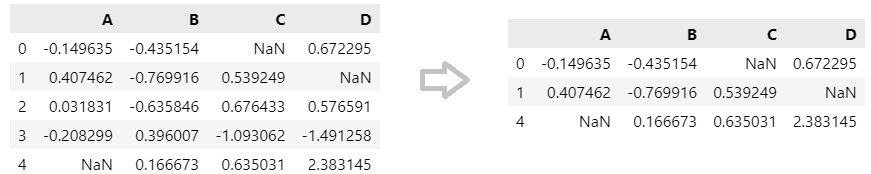

In [7]:
import pandas as pd 
import numpy as np 

df0 = pd.DataFrame(np.random.randn(5, 4), columns=list('ABCD'))
df0.iloc[0,2] = np.nan
df0.iloc[1,3] = np.nan
df0.iloc[4,0] = np.nan
df0

,A,B,C,D
0,0.957020,-2.144985,NaN,-1.382330
1,1.777482,-0.001711,-0.022629,NaN
2,0.351685,-0.187660,-0.135021,0.516950
3,-0.427096,1.806922,0.403471,-1.349055
4,NaN,-0.099703,-1.356922,0.037559


In [9]:
# code here
df0.loc[df0.isna().any(axis=1), :]

,A,B,C,D
0,0.957020,-2.144985,NaN,-1.382330
1,1.777482,-0.001711,-0.022629,NaN
4,NaN,-0.099703,-1.356922,0.037559


### 8-02 결측치 삭제
- dropna(axis, how, thresh)
- axis을 통해 행(axis=0) 또는 열(axis=1)을 지정
- how을 통해 삭제 방법 설정
    - 'any' 로 지정된 경우 1개라도 NaN이 존재하는 행 또는 열 삭제
    - 'all' 로 지정된 경우 모두 NaN인 행 또는 열 삭제
- thresh를 통해 삭제 기준을 지정할 수 있음
    - NA가 아닌 데이터의 최소 개수 지정
- df.dropna(axis=1, how=‘all’) : 열의 모든 값이 NA값으로 구성된 열 제거
- df.dropna(axis=0, thresh=3) : NA가 아닌 데이터가 3개 미만인 행 제거

In [7]:
np.random.seed(0)
df =  pd.DataFrame(np.random.randn(5, 5), 
                  columns=['A','B','C','D','E'])
df = df[df > 0]
df

,A,B,C,D,E
0,1.764052,0.400157,0.978738,2.240893,1.867558
1,NaN,0.950088,NaN,NaN,0.410599
2,0.144044,1.454274,0.761038,0.121675,0.443863
3,0.333674,1.494079,NaN,0.313068,NaN
4,NaN,0.653619,0.864436,NaN,2.269755


In [8]:
# 행의 값 중 하나라도 NaN인 행을 제거
df.dropna(axis=0, how='any')

,A,B,C,D,E
0,1.764052,0.400157,0.978738,2.240893,1.867558
2,0.144044,1.454274,0.761038,0.121675,0.443863


In [9]:
df.dropna()  #axis=0 기본값, how='any' 기본값 

,A,B,C,D,E
0,1.764052,0.400157,0.978738,2.240893,1.867558
2,0.144044,1.454274,0.761038,0.121675,0.443863


In [10]:
# 열의 값 중 하나라도 NaN인 열을 제거
df.dropna(axis=1, how='any')

,B
0,0.400157
1,0.950088
2,1.454274
3,1.494079
4,0.653619


In [13]:
# NA가 아닌 데이터가 3개 미만인 행 제거
# how='any'를 포함시켜도 동일하게 동작함
df.dropna(axis=0, thresh=3)

,A,B,C,D,E
0,1.764052,0.400157,0.978738,2.240893,1.867558
2,0.144044,1.454274,0.761038,0.121675,0.443863
3,0.333674,1.494079,NaN,0.313068,NaN
4,NaN,0.653619,0.864436,NaN,2.269755


### 연습문제 
- 아래 데이터프레임에서  결측치를 제거하세요. 

In [1]:
import numpy as np 
import pandas as pd 
np.random.seed(123)
ar = np.random.randn(4, 3)
ar[:,0] = np.nan 
ar[3,1] = np.nan 
ar[1,2] = np.nan
df0 = pd.DataFrame(ar, index=list('ABCD'), columns=['X1', 'X2', 'X3'])
df0

,X1,X2,X3
A,NaN,0.997345,0.282978
B,NaN,-0.578600,NaN
C,NaN,-0.428913,1.265936
D,NaN,NaN,-0.094709


In [2]:
# code here 
# df0.dropna(thresh=2, axis=1)
df0.dropna(how='all', axis=1)

,X1,X2,X3
A,NaN,0.997345,0.282978
B,NaN,-0.578600,NaN
C,NaN,-0.428913,1.265936
D,NaN,NaN,-0.094709


### 8-03 결측치 대체
- fillna(value, method)
- fillna 함수를 이용하여 결측치 값을 치환
- 1개의 값이 지정된 경우 모든 결측치를 해당 값으로 치환
- 인덱스가 DataFrame의 행 또는 열 인덱스와 동일한 Series 인 경우 각 행 인덱스별
또는 열 인덱스별 값을 치환 가능
    - 예) NA를 제외한 각 컬럼별 평균 값을 계산 후 각 컬럼별 평균 값으로 결측치 대체
- 시계열 데이터인 경우 보간 방법(method)을 설정할 수 있음
    - ffill 인 경우 결측치가 발생한 이전 값으로 대체
    - bfill 인 경우 결측치가 발생한 이후 값으로 대체

In [11]:
# DataFrame df의 결측치를 모두 0으로 대체
df.fillna(0)

,A,B,C,D,E
0,1.764052,0.400157,0.978738,2.240893,1.867558
1,0.000000,0.950088,0.000000,0.000000,0.410599
2,0.144044,1.454274,0.761038,0.121675,0.443863
3,0.333674,1.494079,0.000000,0.313068,0.000000
4,0.000000,0.653619,0.864436,0.000000,2.269755


In [13]:
df.mean()

A    0.747257
B    0.990443
C    0.868071
D    0.891879
E    1.247944
dtype: float64

In [12]:
# DataFrame df의 결측치를 모두 df.mean()으로 대체
df.fillna( df.mean() )

,A,B,C,D,E
0,1.764052,0.400157,0.978738,2.240893,1.867558
1,0.747257,0.950088,0.868071,0.891879,0.410599
2,0.144044,1.454274,0.761038,0.121675,0.443863
3,0.333674,1.494079,0.868071,0.313068,1.247944
4,0.747257,0.653619,0.864436,0.891879,2.269755


In [14]:
df.fillna( df.median() )

,A,B,C,D,E
0,1.764052,0.400157,0.978738,2.240893,1.867558
1,0.333674,0.950088,0.864436,0.313068,0.410599
2,0.144044,1.454274,0.761038,0.121675,0.443863
3,0.333674,1.494079,0.864436,0.313068,1.155711
4,0.333674,0.653619,0.864436,0.313068,2.269755


In [15]:
# DataFrame df의 결측치를 '이전 값'으로 대체, axis = 0 방향
df.fillna(method='ffill')

,A,B,C,D,E
0,1.764052,0.400157,0.978738,2.240893,1.867558
1,1.764052,0.950088,0.978738,2.240893,0.410599
2,0.144044,1.454274,0.761038,0.121675,0.443863
3,0.333674,1.494079,0.761038,0.313068,0.443863
4,0.333674,0.653619,0.864436,0.313068,2.269755


In [16]:
# DataFrame df의 결측치를 '다음 값'으로 대체, axis = 0 방향
df.fillna(method='bfill')

,A,B,C,D,E
0,1.764052,0.400157,0.978738,2.240893,1.867558
1,0.144044,0.950088,0.761038,0.121675,0.410599
2,0.144044,1.454274,0.761038,0.121675,0.443863
3,0.333674,1.494079,0.864436,0.313068,2.269755
4,NaN,0.653619,0.864436,NaN,2.269755


In [17]:
df

,A,B,C,D,E
0,1.764052,0.400157,0.978738,2.240893,1.867558
1,NaN,0.950088,NaN,NaN,0.410599
2,0.144044,1.454274,0.761038,0.121675,0.443863
3,0.333674,1.494079,NaN,0.313068,NaN
4,NaN,0.653619,0.864436,NaN,2.269755


### 연습문제 
- 왼쪽 데이터 프레임에서 오른쪽 데이터 프레임과 같이 'A'의 결측치를 'A' 의 최대값으로 채워보세요. 
- 전  ---> 후 

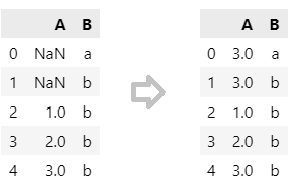

In [3]:
# df1 생성코드. 그대로 수행하세요.
df1 = pd.DataFrame([[np.nan, 'a'], [np.nan, 'b'], [1.0, 'b'], [2.0, 'b'], [3.0, 'b']], columns=['A', 'B'])
df1

,A,B
0,NaN,a
1,NaN,b
2,1.0,b
3,2.0,b
4,3.0,b


In [4]:
# code here 
df1['A'] = df1['A'].fillna(df1['A'].max())
df1

,A,B
0,3.0,a
1,3.0,b
2,1.0,b
3,2.0,b
4,3.0,b


In [ ]:
#질문 
1.
# df.fillna(df.mean()) 은 열의 평균을 NaN에 넣는 것 같은데, 
# 행의 평균은 df.fillna(df.mean(axis=1)) 로 하면 되나요?  
# => df.fillna(df.mean()) 일반적임

2.
# concat은 df를 []로 묶어서 넣는데, merge는 ,로 구분해서 넣는건가요?
# pd.concat([df1, df2, df3])   #한번에 여러개 
# pd.merge(df1, df2, on='K')   #한번에 2개 

3.
# df.groupby('X').count()
# df.groupby('X').size()  #편의상 
# 이 두개는 같은 값을 출력하는 것 아닌가요?

## 9.데이터 연결
- 분석의 규모가 커지게 되면 여러 개의 데이터 테이블 이용
    - 하나의 테이블에 모든 데이터를 기록하는 것은 좋지 않아 데이터가 여러 테이블로 분리 되어 있기 때문
- 데이터 분석을 위해 분할된 여러 데이터 테이블을 하나로 만드는 것이 중요함
- Pandas의 경우 DataFrame과 DataFrame을 연결 또는 병합할 수 있음
    - concat 함수 : 단순히 DataFrame을 연결하는 용도
    - merge 함수 : 특정 기준으로 DataFrame을 연결하는 용도

### 9-01 concat 함수
- pd.concat([dataframe, …, dataframe], axis, join, ignore_index)
- 단순히 여러 Series 또는 DataFrame을 연결(concatenate) 하기 때문에 Index 값이
중복 될 수 있음
- 기본적으로는 상하 연결(axis=0) 또는 좌우(axis=1) 연결
- 동일한 이름을 갖는 인덱스가 없는 경우 NaN 값이 위치(join='outer')
- 동일한 이름을 갖는 경우만 결합하고 싶은 경우 join='inner' 설정
-ignore_index가 True로 설정된 경우 연결 시 기존의 인덱스를 무시함

In [22]:
df1 = pd.DataFrame({
    'K' : ['K0', 'K1', 'K2'],
    'X2' : ['A', 'B', 'A'],
    'X3' : [1, 2, 3]
})
df1

,K,X2,X3
0,K0,A,1
1,K1,B,2
2,K2,A,3


In [23]:
df2 = pd.DataFrame({
    'K' : ['K1', 'K2', 'K3'],
    'X3' : ['B', 'A', 'B'],
    'X4' : [4, 5, 6]
})
df2

,K,X3,X4
0,K1,B,4
1,K2,A,5
2,K3,B,6


In [21]:
# concat을 사용하여 df1과 df2를 행방향으로 결합
pd.concat([df1, df2], axis=0)

,K,X2,X3,X4
0,K0,A,1,NaN
1,K1,B,2,NaN
2,K2,A,3,NaN
0,K1,NaN,B,4.0
1,K2,NaN,A,5.0
2,K3,NaN,B,6.0


In [22]:
# concat을 사용하여 df1과 df2를 행방향으로 결합
# join='inner'을 사용하여 동일한 열이름이 있는 경우만 결합하도록 함
pd.concat([df1, df2], axis=0, join='inner')

,K,X3
0,K0,1
1,K1,2
2,K2,3
0,K1,B
1,K2,A
2,K3,B


In [20]:
# concat을 사용하여 df1과 df2를 열방향으로 결합
df3 = pd.concat([df1, df2], axis=1)
df3

,K,X2,X3,K,X3,X4
0,K0,A,1,K1,B,4
1,K1,B,2,K2,A,5
2,K2,A,3,K3,B,6


In [21]:
df2['K']

,K,K
0,K0,K1
1,K1,K2
2,K2,K3


In [24]:
# concat을 사용하여 df1과 df2를 열방향으로 결합
# index를 무시하도록 한다
pd.concat([df1, df2], axis=1, ignore_index=True)

,0,1,2,3,4,5
0,K0,A,1,K1,B,4
1,K1,B,2,K2,A,5
2,K2,A,3,K3,B,6


### 연습문제 
- 다음과 같이 left와 right라는 데이터 프레임 변수가 있을때 변경 후와 같은 데이터 프레임을 만들기 위한 코드를 작성하세요. 

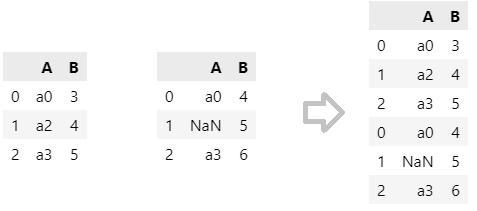

In [1]:
import pandas as pd 
import numpy as np
left = pd.DataFrame([['a0', 3],['a2',4],['a3',5]], columns=['A', 'B'])
left

,A,B
0,a0,3
1,a2,4
2,a3,5


In [2]:
right = pd.DataFrame([['a0', 4],[np.nan,5],['a3',6]], columns=['A', 'B'])
right

,A,B
0,a0,4
1,NaN,5
2,a3,6


In [3]:
# code here 

pd.concat([left, right])

,A,B
0,a0,3
1,a2,4
2,a3,5
0,a0,4
1,NaN,5
2,a3,6


### 9-02 merge 함수
- pd.merge(on, how)
- **두 DataFrame**의 공통 열(Label) 혹은 인덱스를 기준으로 두 DataFrame 병합
- 기준이 되는 열, 행의 데이터를 키(key)라고하며 병합 기준이 될 컬럼을 on으로 설정
- 기본적인 결합 방법은 키가 중복되어 존재하는 경우(inner)만 결합
- 결합 방법을 변경하고자 하는 경우 how를 outer, left, right로 변경 가능

In [25]:
df1

,K,X2,X3
0,K0,A,1
1,K1,B,2
2,K2,A,3


In [26]:
df2

,K,X3,X4
0,K1,B,4
1,K2,A,5
2,K3,B,6


In [25]:
# merge를 사용하여 df1, df2를 'K'를 key로 하여 'inner' 결합함
# df1, df2의 'K'에 같은 값이 있는 경우에만 결합
pd.merge(df1, df2, on='K', how='inner')

,K,X2,X3_x,X3_y,X4
0,K1,B,2,B,4
1,K2,A,3,A,5


In [26]:
# merge를 사용하여 df1, df2를 'K'를 key로 하여 'outer' 결합함
# df1, df2의 'K'의 모든 경우에 대해 결합, 대응되는 값이 없는 경우 NaN으로 채움
pd.merge(df1, df2, on='K', how='outer')

,K,X2,X3_x,X3_y,X4
0,K0,A,1.0,NaN,NaN
1,K1,B,2.0,B,4.0
2,K2,A,3.0,A,5.0
3,K3,NaN,NaN,B,6.0


In [27]:
# merge를 사용하여 df1, df2를 'K'를 key로 하여 'left' 결합
# df1에 해당하는 모든 'K'에 해당하는 값 포함
# df2는 df1과 같은 값이 있는 경우만 포함
pd.merge(df1, df2, on='K', how='left')

,K,X2,X3_x,X3_y,X4
0,K0,A,1,NaN,NaN
1,K1,B,2,B,4.0
2,K2,A,3,A,5.0


In [27]:
# merge를 사용하여 df1, df2를 'K'를 key로 하여 'right' 결합
# df2에 해당하는 모든 'K'에 해당하는 값 포함
# df1은 df2와 같은 값이 있는 경우만 포함
pd.merge(df1, df2, on='K', how='right',
         suffixes=('_df1', '_df2'))

,K,X2,X3_df1,X3_df2,X4
0,K1,B,2.0,B,4
1,K2,A,3.0,A,5
2,K3,NaN,NaN,B,6


### 연습문제 
- 다음과 같이 left, right 데이터 프레임변수가 있을때 병합을 통해 아래 데이터 프레임을 만들기 위한 코드를 .
- left = pd.DataFrame([['a0', 3],['a2',4],['a3',5]], columns=['A', 'B'])
- right = pd.DataFrame([['a0', 4],[np.nan,5],['a3',6]], columns=['A', 'B'])

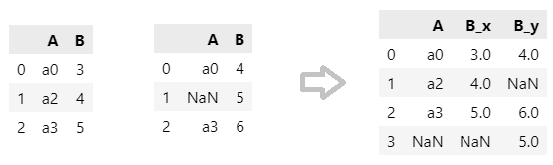

In [4]:
left = pd.DataFrame([['a0', 3],['a2',4],['a3',5]], columns=['A', 'B'])
right = pd.DataFrame([['a0', 4],[np.nan,5],['a3',6]], columns=['A', 'B'])
left

,A,B
0,a0,3
1,a2,4
2,a3,5


In [5]:
right

,A,B
0,a0,4
1,NaN,5
2,a3,6


In [6]:
# code here 
pd.merge(left, right, on='A', how='outer')

,A,B_x,B_y
0,a0,3.0,4.0
1,a2,4.0,NaN
2,a3,5.0,6.0
3,NaN,NaN,5.0


## 10.Grouping
- 그룹 분석은 자료를 집단별로 나누어 그룹 함수를 적용한 분석 방법
    - 빈도 분석은 그룹별 빈도만을 산출
    - 그룹 분석은 빈도는 물론 그룹별 특정 값에 대한 합계, 평균, 표준편차, 중앙값, 최소값, 최대값과 같은 결과 산출
- groupby 함수를 이용하여 그룹별 집계 결과를 계산
    - groupby는 데이터를 그룹별로 분할하고(Splitting), 각 그룹별로 집계 함수를 적용
    (Applying) 후 하나로 합친(Combining) 결과를 반환함
    - 그룹 기준, 집계 대상, 집계 방법 지정


In [29]:
df = pd.DataFrame({
    'X' : ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'],
    'Y' : [3, 1, 0, 1, 7, 3, 2, 1, 3],
    'Z' : [1, 2, 5, 6, 2, 3, 4, 1, 2]
})
df

,X,Y,Z
0,A,3,1
1,A,1,2
2,A,0,5
3,B,1,6
4,B,7,2
5,B,3,3
6,C,2,4
7,C,1,1
8,C,3,2


In [34]:
# 교재 227 그림 확인
# DataFrame df를 'A'열을 기준으로 그룹별 합계 구하기
df.groupby('X').sum()
df.groupby('X').mean()
df.groupby('X').min()
df.groupby('X').max()
df.groupby('X').count()
df.groupby('X').size()

X
A    3
B    3
C    3
dtype: int64

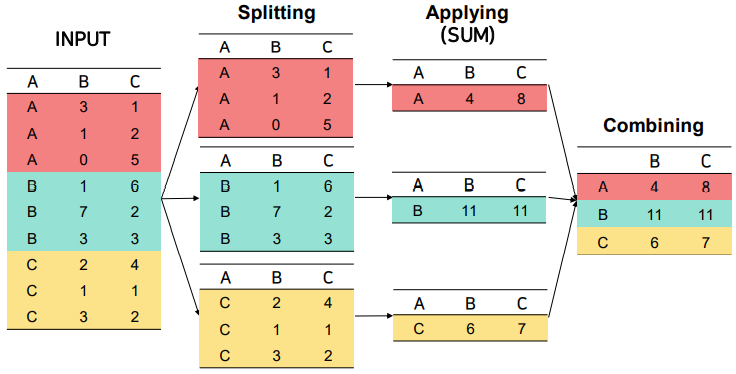

In [36]:
# DataFrame df를 'X'열을 기준으로 'Y'열에 대해 그룹별 합계 구하기
df.groupby('X')['Y'].sum()

X
A     4
B    11
C     6
Name: Y, dtype: int64

In [37]:
# DataFrame df를 'X'열을 기준으로 ['Y', 'Z']열에 대해 그룹별 합계 구하기
df.groupby('X')[['Y','Z']].sum()

,Y,Z
X,,
A,4,8
B,11,11
C,6,7


In [40]:
# DataFrame df를 'X'열을 기준으로 그룹별 합계 구하기
# agg(np.sum) 을 사용하여 합계를 구함
df.groupby('X').agg(np.sum)
df.groupby('X').agg([np.sum, np.mean])

Y             Z          
  sum      mean sum      mean
X                            
A   4  1.333333   8  2.666667
B  11  3.666667  11  3.666667
C   6  2.000000   7  2.333333

In [41]:
# DataFrame df를 'A'열을 기준으로 그룹별 합계 구하기
# agg('sum') 을 사용하여 합계를 구함
df.groupby('X').agg('sum')

,Y,Z
X,,
A,4,8
B,11,11
C,6,7


In [42]:
# DataFrame df를 'A'열을 기준으로 그룹별 합계와 평균 구하기
# agg(['sum', 'mean']) 을 사용하여 합계와 평균을 구함
df.groupby('X').agg(['sum', 'mean'])

Y             Z          
  sum      mean sum      mean
X                            
A   4  1.333333   8  2.666667
B  11  3.666667  11  3.666667
C   6  2.000000   7  2.333333

### 연습문제 
- 변수의 이름이 df0인 데이터 프레임을 생성하고, 컬럼명이 'A','B'  컬럼을 기준으로 평균을 계산하는 코드를 작성하세요. 
- data = {
        'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
        'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
        'C' : [7, 2, 6, 0, 9, 9, 9, 7],
        'D' : [8, 1, 5, 9, 1, 5, 7, 3],
 }


In [7]:
data = {
        'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
        'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
        'C' : [7, 2, 6, 0, 9, 9, 9, 7],
        'D' : [8, 1, 5, 9, 1, 5, 7, 3],
 }

# code here 
df0 = pd.DataFrame(data)
df0.groupby(['A', 'B']).mean()

C    D
A   B              
bar one    2.0  1.0
    three  0.0  9.0
    two    9.0  5.0
foo one    8.0  7.5
    three  7.0  3.0
    two    7.5  3.0

## 11.Pivoting
- 데이터를 보다 빠르고 쉽게 분석 가능
- 행, 열 방향으로 필드를 재배치해 한 눈에 데이터 보기가 용이함
- Excel의 피벗 테이블 기능을 Pandas에서도 동일하게 사용 가능
- 행으로만 지정 가능한 groupby와는 다르게 pivot_table의 경우 열로도 지정 가
능
- pivot_table(values, index, columns, aggfunc, fill_value)
    - values : 집계하려는 열의 Label 혹은 Label의 리스트
    - index : 피벗 테이블 행의 그룹으로 묶을 열의 Label이나 그룹 키
    - columns : 피벗 테이블 열의 그룹으로 묶을 열의 Label 이름이나 그룹 키
    - aggfunc : 집계 함수나 함수 리스트, 기본 값은 mean
    - fill_value : 누락된 값의 대체 값

In [47]:
# DataFrame df에 'D'열을 추가함
df = pd.DataFrame({
    'A' : ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'],
    'B' : [3, 1, 0, 1, 7, 3, 2, 1, 3],
    'C' : [1, 2, 5, 6, 2, 3, 4, 1, 2]
})
 
df['D'] = ['X', 'X', 'Y', 'X', 'Y', 'X', 'X', 'Y', 'X']
df

,A,B,C,D
0,A,3,1,X
1,A,1,2,X
2,A,0,5,Y
3,B,1,6,X
4,B,7,2,Y
5,B,3,3,X
6,C,2,4,X
7,C,1,1,Y
8,C,3,2,X


In [2]:
import pandas as pd
df = pd.DataFrame([[1, 2, 3], 
                                  [4, 5, 6],
                                  [7, 8, 9]], index = ('A','B','C'), columns = ('X1','X2','X3'))

df

,X1,X2,X3
A,1,2,3
B,4,5,6
C,7,8,9


In [65]:
# fill_value 예제 
df = pd.DataFrame({
    'A' : ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C','D'],
    'B' : [3, 1, 0, 1, 7, 3, 2, 1, 3,1],
    'C' : [1, 2, 5, 6, 2, 3, 4, 1, 2,1]
})
 
df['D'] = ['X', 'X', 'Y', 'X', 'Y', 'X', 'X', 'Y', 'X','X']
df
df.pivot_table(index='A', columns='D', values=['B', 'C'], aggfunc='sum', fill_value=0)

B     C   
D  X  Y  X  Y
A            
A  4  0  3  5
B  4  7  9  2
C  5  1  6  1
D  1  0  1  0

In [48]:
# 피벗테이블의 행의 그룹을 'A'로 하고, 열의 그룹을 'D'로 하고
# 집계하려는 열은 ['B', 'C']이며, 집계 함수는 'sum'인 피벗 테이블을 생성
# index ='행그룹', columns = '열그룹', values='집계 대상', aggfunc='집계함수'

df.pivot_table(index='A', columns='D', values=['B', 'C'], aggfunc='sum')

B     C   
D  X  Y  X  Y
A            
A  4  0  3  5
B  4  7  9  2
C  5  1  6  1

In [62]:
df.pivot_table(index='A', columns='D', values='B', aggfunc='mean')
df.pivot_table(index='A', columns='D', values='B', aggfunc='count', fill_value=0)

D,X,Y
A,,
A,2,1
B,2,1
C,2,1


### 연습문제 
- 사전자료형 변수(data)를 사용하여 df1 데이터 프레임을 생성하고, 해당 데이터 프레임변수를 이용하여 index를 'A', 
컬럼을 'B'로 하여 'C'와 'D' 컬럼의 평균을 계산하는 코드를 작성하세요. 
- data = {
        'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
        'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
        'C' : [7, 2, 6, 0, 9, 9, 9, 7],
        'D' : [8, 1, 5, 9, 1, 5, 7, 3],
}

In [8]:
import pandas as pd

data = {
        'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
        'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
        'C' : [7, 2, 6, 0, 9, 9, 9, 7],
        'D' : [8, 1, 5, 9, 1, 5, 7, 3],
}

# code here 
df1 = pd.DataFrame(data) 
df1.pivot_table(index='A', columns='B')

C               D           
B    one three  two  one three  two
A                                  
bar  2.0   0.0  9.0  1.0   9.0  5.0
foo  8.0   7.0  7.5  7.5   3.0  3.0

# 그이외의 기능 
- Pandas의 각 열은 datatype별 기능지원 
  - 문자타입은 str 
  - 날짜타입은 dt

In [1]:
import pandas as pd 
df = pd.DataFrame({'A':[' a','b ',' c ','\td'], 
              'B': pd.Series(['20200101','20200102','20200103','20200104'],
                             dtype='datetime64[ns]')})

In [2]:
df

,A,B
0,a,2020-01-01
1,b,2020-01-02
2,c,2020-01-03
3,\td,2020-01-04


In [3]:
df['C1']  = df['A'].str.strip()  # 앞 뒤 공백을 제거
df['C2'] = df['A'].str.lstrip() # 앞 공백을 제거
df['C3'] = df['A'].str.rstrip() # 뒤 공백을 제거
df['C4'] = df['A'].str.upper() # 대문자

In [4]:
df

,A,B,C1,C2,C3,C4
0,a,2020-01-01,a,a,a,A
1,b,2020-01-02,b,b,b,B
2,c,2020-01-03,c,c,c,C
3,\td,2020-01-04,d,d,\td,\tD


In [5]:
df['B'].dt.year
df['B'].dt.month
df['B'].dt.day

0    1
1    2
2    3
3    4
Name: B, dtype: int64